In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('./data/heart.csv')

In [26]:
df.shape

(918, 12)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [28]:
df.duplicated().sum()

np.int64(0)

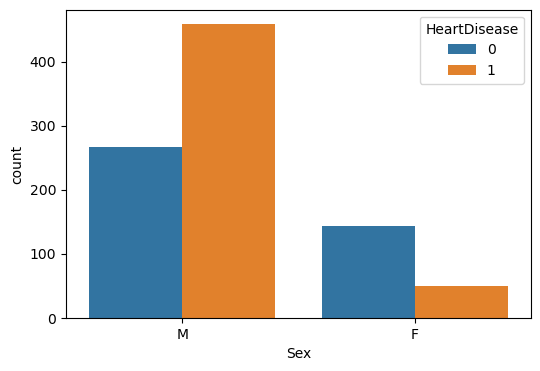

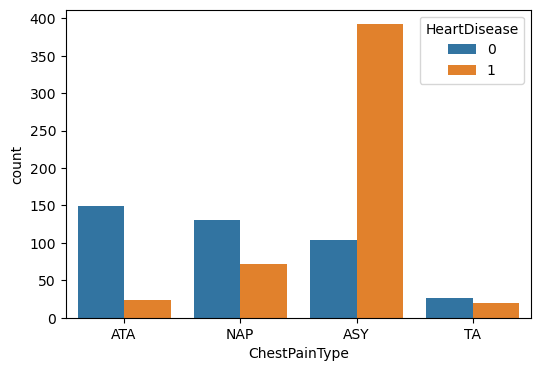

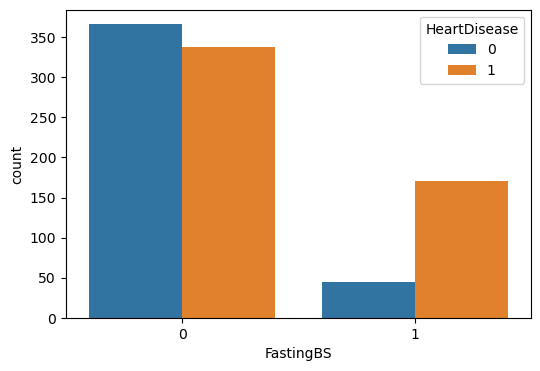

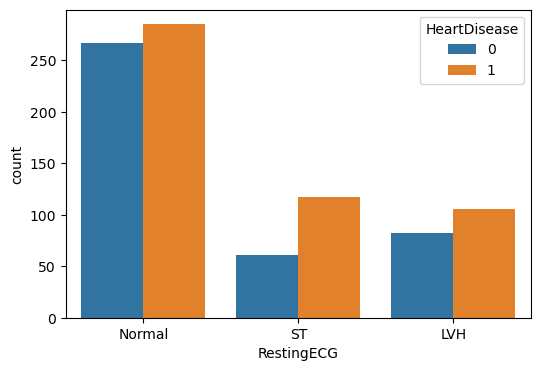

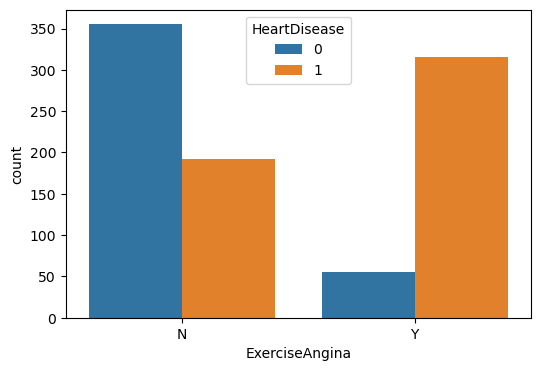

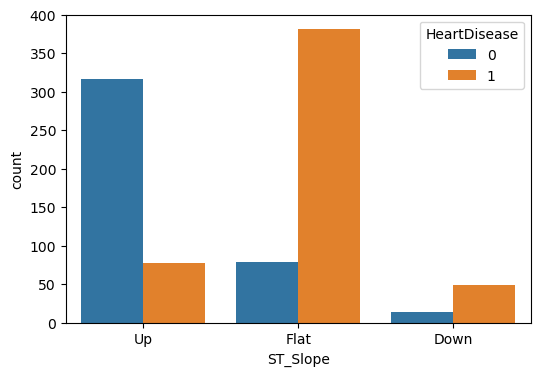

In [29]:
cat_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in cat_columns:
    plt.figure(figsize= (6,4))
    sns.countplot(x = df[col], hue= df['HeartDisease'])

In [30]:
cholesterol_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()

df['Cholesterol'] = df['Cholesterol'].replace(0, cholesterol_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [31]:
restingBP_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()

df['RestingBP'] = df['RestingBP'].replace(0, restingBP_mean)
df['RestingBP'] = df['RestingBP'].round(2)

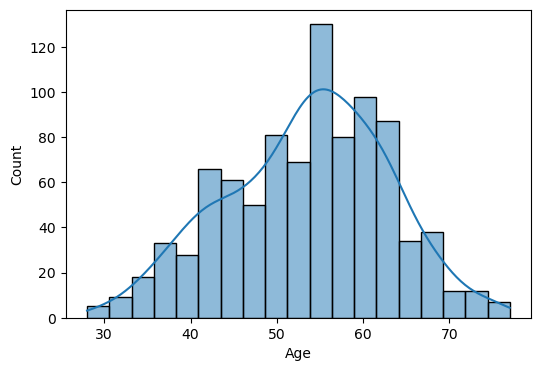

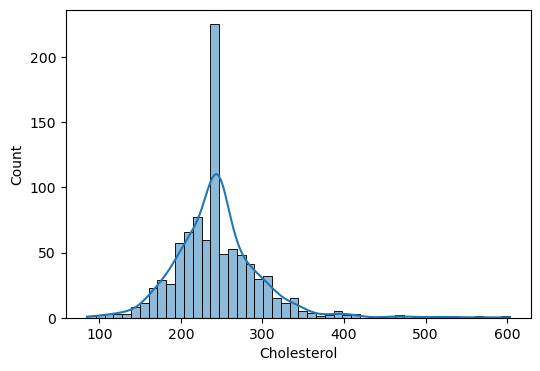

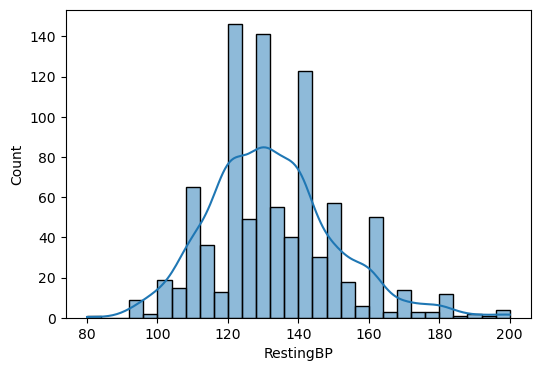

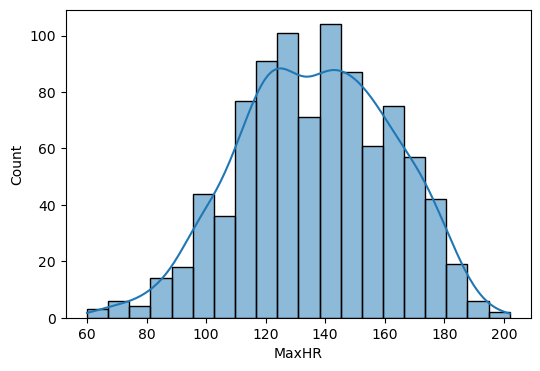

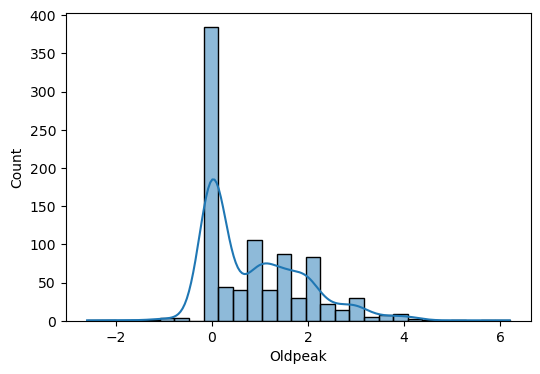

In [32]:
num_columns = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak']

for col in num_columns:
    plt.figure(figsize= (6, 4))
    sns.histplot(x = df[col], kde= True)

In [33]:
x = df.drop(columns= 'HeartDisease', axis=1)
y = df['HeartDisease']

In [34]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up


In [35]:
x['Sex'] = x['Sex'].map({'M': 0, 'F': 1})

In [36]:
x['ExerciseAngina'] = x['ExerciseAngina'].map({'N': 0, 'Y': 1})

In [37]:
x = pd.get_dummies(data = x, columns= ['ChestPainType', 'RestingECG', 'ST_Slope'])

In [38]:
boolean_columns = x.select_dtypes(include='bool').columns

x[boolean_columns] = x[boolean_columns].astype(int)

In [39]:
x.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140.0,289.0,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1
1,49,1,160.0,180.0,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0
2,37,0,130.0,283.0,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
3,48,1,138.0,214.0,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0
4,54,0,150.0,195.0,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in num_columns:
    x[col] = scaler.fit_transform(x[[col]])

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score

In [43]:
results = []

In [44]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors= 9),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    results.append({
        'model': name,
        'accuracy': round(acc, 2),
        'f1_score': round(f1, 2)
    })

In [45]:
results

[{'model': 'Logistic Regression', 'accuracy': 0.87, 'f1_score': 0.88},
 {'model': 'KNN', 'accuracy': 0.88, 'f1_score': 0.89},
 {'model': 'Naive Bayes', 'accuracy': 0.84, 'f1_score': 0.85},
 {'model': 'Decision Tree', 'accuracy': 0.81, 'f1_score': 0.82},
 {'model': 'SVM', 'accuracy': 0.86, 'f1_score': 0.88}]